# Homework ada3

### TMI M1 37-176839 Koichiro Tamura

#### homework 1

#### prove the following formula

$$ \min_{z} {T(\mathbf{z})} = \max(0, \theta+u-\lambda) + \min(0, \theta+u+\lambda) $$

$$ s.t  \ \ T(z) = \lambda|z| + u(\theta -z) + \frac{1}{2}(\theta - z)^{2} $$

#### proof:

i) if $z > 0$ :
    $$\frac{\partial T(z)}{\partial z} = \lambda - u + (z - \theta) = 0 $$
    \begin{equation}
    \therefore \qquad z = \theta + u -\lambda
    \end{equation}
   $$\min(0, \theta+u+\lambda) = 0 \qquad \because \lambda \ge 0 $$
   
ii) if $z<0$ :
    $$\frac{\partial T(z)}{\partial z} = - \lambda - u + (z - \theta) = 0 $$
    $$ \therefore \qquad z = \theta + u +\lambda$$
    $$ \max(0, \theta+u-\lambda) = 0 \qquad \because \lambda \ge 0 $$
    
    

therefore,
$$\min_{z} {T(\mathbf{z})} = \max(0, \theta+u-\lambda) + \min(0, \theta+u+\lambda)$$

<div style="text-align: right;">
【Q.E.D】
</div>

### [homework 2]

In [1]:
%matplotlib inline

import numpy as np
import math
import random
import matplotlib.pyplot as plt

###### y = sin(πx)/(πx) + 0.1x 

In [2]:
def func(x):
    return math.sin(math.pi*x) / math.pi*x + 0.1*x

###### create dataset with noise

In [3]:
train_x = np.linspace(-3, 3, 500)
# np.random.shuffle(train_x)
train_y = np.array([func(train_x[i]) for i in range(len(train_x))] + (np.random.rand(len(train_x)) - 0.5)*0.2)
test_x = np.linspace(-3, 3, 50)
test_y = np.array([func(test_x[i]) for i in range(len(test_x))] + (np.random.rand(len(test_x)) - 0.5)*0.2)

##### define GaussKernelModel

In [4]:
class GaussKernelModel(object):
    """sparse regression of GaussKernelModel """
    def __init__(self, h=0.3, _lambda=0.1):
        # hyperparameter 
        self.h = h
        self._lambda = _lambda
        self.theta = None
        self.z = None
        self.u = None
        self.train_x = None
        self.sigma = 0.1
    
    def fit(self, train_x, train_y):
        """cal theta  by Alternating Direction Method of Multipliers"""
        self.train_x = train_x
        trian_y = train_y.reshape([len(train_y), 1])
        # cal K
        K =  np.zeros(len(train_x)*len(train_x)).reshape([len(train_x), len(train_x)])

        for i in range(len(train_x)):
            for j in range(len(train_x)):
                K[i, j] = self.kernel(train_x[i], train_x[j])
        
        # initialize 
        np.random.seed(0)
        self.theta = np.random.rand(K.shape[0])
        np.random.seed(1)
        self.z = np.random.rand(K.shape[0])
        np.random.seed(2)
        self.u = np.random.rand(K.shape[0])
        sigma = float("inf")
        count = 0
        
        # update 
        while self.sigma < sigma:
            
            # theta
            theta = np.linalg.inv(K.T.dot(K) + np.eye(K.shape[0])).dot((K.T).dot(train_y) + self.z -self.u)
            sigma = np.linalg.norm(self.theta - theta)
            self.theta = theta
            
            # z
            if np.linalg.norm(self.theta + self.u - self._lambda) > 0:
                z = self.theta + self.u - self._lambda
            elif np.linalg.norm(self.theta + self.u + self._lambda) < 0:
                z = self.theta + self.u + self._lambda
            else:
                z = np.zeros(K.shape[0])
                
            # u
            self.u += self.theta - self.z
            count += 1
           
            # print(count)
            
        
    def kernel(self, x, c):
        """kernel function"""
        return math.exp(-1*np.power(x-c, 2).sum()) / (2*self.h**2)
    
    def predict(self, test_x):
        """
        predict funcation
        :return :predictions
        """
        if self.theta is None:
            print("You have not fitted yet.")
        predictions = []
        for i in range(len(test_x)):
            predict = 0
            for j in range(len(self.train_x)):
                predict += self.theta[j]*self.kernel(test_x[i], self.train_x[j])
            predictions.append(predict)
        return np.array(predictions)

In [5]:
# train
model = GaussKernelModel()
model.fit(train_x, train_y)

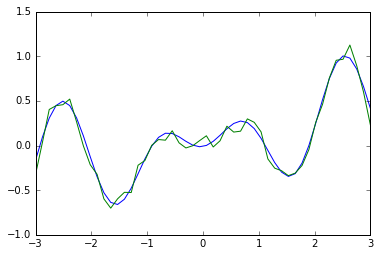

In [6]:
# predict
y = model.predict(test_x)
plt.plot(test_x, y)
plt.plot(test_x, test_y)